In [2]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime

# Ignore warnings
warnings.filterwarnings("ignore")

# Set pandas display options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Ensure plots are displayed inline
%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading Data from CSV File and Inspecting Data Dimensions



In [4]:
NP = pd.read_csv("/content/drive/My Drive/CSV/midtermgentdataFinal.csv")
NP.shape

(201092, 144)

In [5]:
NP = NP.rename(columns={"Bedrooms": "Roof Material", "Roof Material": "Bedrooms", "Attic Type": "Half Baths", "Half Baths": "Attic Type","Large Home Indicator": "Land Square Feet", "Land Square Feet": "Large Home Indicator"})


Analyzing the Count of Positive Differences in Certified and Mailed CCAO Values

In [6]:
NP['diff_CCAO'] =  NP['CCAO mailed AV'] - NP['CCAO certified AV']
(NP['diff_CCAO']>0).value_counts()

True     200949
False       143
Name: diff_CCAO, dtype: int64

In [7]:
NP['diff_CCAO'].describe()

count    201092.000000
mean       2017.735623
std        1348.567057
min           0.000000
25%        1166.000000
50%        1830.000000
75%        2593.000000
max      129540.000000
Name: diff_CCAO, dtype: float64

Selecting and Extracting Specific Columns from a DataFrame

In [8]:
def few_columns(columns,NP):
      NP2=NP[columns]
      return NP2



In [9]:
some_cols = ['Full Baths','Half Baths', 'Use','Garage 1 Size','area_num_1','Repair Condition','parceltype',
                 'Bedrooms','assessorbl','assessornb','Basement','Central Heating','Basement Finish',
                 'Tax Rate','CCAO adjustment indicator','Township','community','staterepre', 'statesenat', 'Building Square Feet',
            'congressio','Land Square Feet', 'Comm - Total Population','Type of Residence', 'Rooms','commission', 'censustrac','Central Air Conditioning',
            'BOR certified AV (final)','Comm VGentIndex- 1970-2010',
             'diff_CCAO']

In [10]:
new_NP = few_columns(some_cols,NP)


Creating a Copy of Data: 'imputed_NP'



In [11]:
imputed_NP = new_NP.copy()


Imputing Missing Data in a DataFrame

In [12]:
for column in imputed_NP.columns:
    if imputed_NP[column].dtypes  == 'object' or imputed_NP[column].dtype.name == 'category':
        imputed_NP[column].fillna(imputed_NP[column].mode().iloc[0], inplace=True)
    else:
        median = imputed_NP[column].median()
        if not pd.isna(median):
            imputed_NP[column].fillna(median, inplace=True)

Selecting Numeric Columns for Visualization

In [13]:
import matplotlib.pyplot as plt
numeric_cols = imputed_NP.select_dtypes(include=['number']).columns.tolist()

Visualizing Correlation Matrix of Numeric Columns

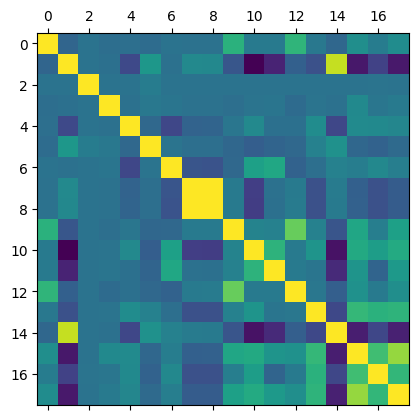

In [14]:
plt.matshow(imputed_NP[numeric_cols].corr())
plt.show()


Calculating and Visualizing Correlation Matrix of Numeric Columns



In [15]:
corr = imputed_NP[numeric_cols].corr()
corr.style.background_gradient(cmap='coolwarm')
corr.to_csv(r"correl.csv")
corr

,Full Baths,area_num_1,parceltype,assessorbl,assessornb,Tax Rate,Township,staterepre,statesenat,Building Square Feet,congressio,Comm - Total Population,Rooms,commission,censustrac,BOR certified AV (final),Comm VGentIndex- 1970-2010,diff_CCAO
Full Baths,1.000000,-0.084080,0.002785,-0.030313,-0.020342,-0.041699,0.001716,-0.005195,-0.004816,0.419366,0.054591,0.048464,0.442632,0.036832,-0.075099,0.185093,0.064457,0.174145
area_num_1,-0.084080,1.000000,0.000377,-0.016104,-0.258280,0.244214,-0.009092,0.147759,0.143575,-0.179614,-0.611440,-0.452729,-0.114352,-0.211419,0.859986,-0.508416,-0.295962,-0.499727
parceltype,0.002785,0.000377,1.000000,-0.000021,-0.000820,0.064543,0.004744,-0.000415,-0.000433,0.003567,0.000865,0.004007,0.001692,0.000309,0.003786,0.003787,0.005934,0.002443
assessorbl,-0.030313,-0.016104,-0.000021,1.000000,-0.007172,0.035181,0.015057,-0.006786,-0.006800,-0.022134,0.008561,0.012813,-0.046249,0.006370,-0.013272,0.151465,0.023756,0.055617
assessornb,-0.020342,-0.258280,-0.000820,-0.007172,1.000000,-0.068393,-0.270860,-0.098208,-0.094663,0.024250,0.146433,-0.018265,-0.013567,0.173622,-0.266777,0.157778,0.152029,0.129309
Tax Rate,-0.041699,0.244214,0.064543,0.035181,-0.068393,1.000000,0.009748,-0.021239,-0.023869,-0.075492,-0.130977,-0.089454,-0.069946,0.096036,0.202626,-0.076095,-0.103817,-0.052726
Township,0.001716,-0.009092,0.004744,0.015057,-0.270860,0.009748,1.000000,-0.187075,-0.198333,-0.065011,0.306963,0.347827,-0.103803,-0.022095,0.095438,0.068851,0.142105,0.076144
staterepre,-0.005195,0.147759,-0.000415,-0.006786,-0.098208,-0.021239,-0.187075,1.000000,0.999331,0.047719,-0.312917,-0.011422,0.054030,-0.211764,0.058613,-0.116225,-0.211891,-0.143793
statesenat,-0.004816,0.143575,-0.000433,-0.006800,-0.094663,-0.023869,-0.198333,0.999331,1.000000,0.050471,-0.318824,-0.015475,0.055938,-0.209525,0.054429,-0.113496,-0.208593,-0.141913
Building Square Feet,0.419366,-0.179614,0.003567,-0.022134,0.024250,-0.075492,-0.065011,0.047719,0.050471,1.000000,0.109600,0.096446,0.626606,0.095124,-0.187082,0.339913,0.075872,0.302550


Histogram of the 'Rooms' Variable

<Axes: >

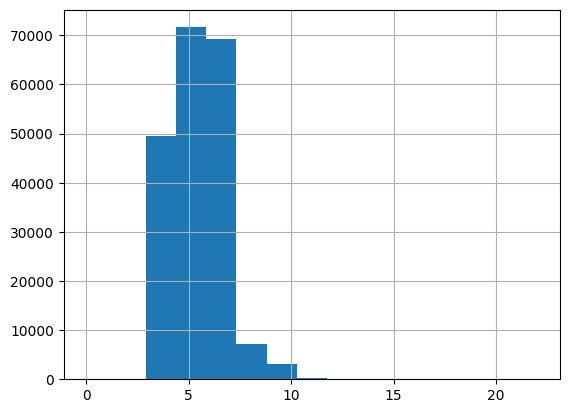

In [16]:
imputed_NP['Rooms'].hist(bins=15)


In [17]:
imputed_NP.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201092 entries, 0 to 201091
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Full Baths                  201092 non-null  int64  
 1   Half Baths                  201092 non-null  object 
 2   Use                         201092 non-null  object 
 3   Garage 1 Size               201092 non-null  object 
 4   area_num_1                  201092 non-null  int64  
 5   Repair Condition            201092 non-null  object 
 6   parceltype                  201092 non-null  int64  
 7   Bedrooms                    201092 non-null  object 
 8   assessorbl                  201092 non-null  float64
 9   assessornb                  201092 non-null  float64
 10  Basement                    201092 non-null  object 
 11  Central Heating             201092 non-null  object 
 12  Basement Finish             201092 non-null  object 
 13  Tax Rate      

Box Plot of the 'Rooms' Variable



<Axes: >

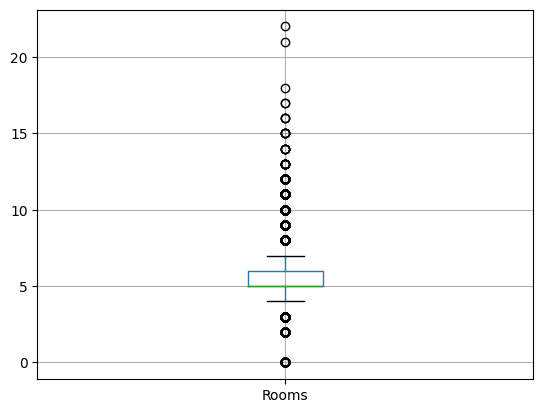

In [18]:
imputed_NP.boxplot(column='Rooms')


Scatter Plot Between 'Rooms' and 'diff_CCAO' Variables



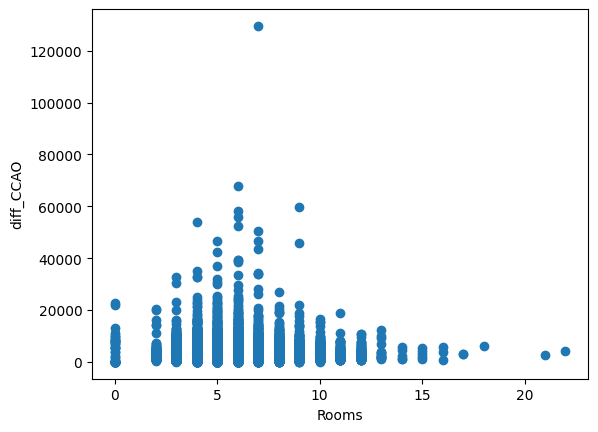

In [19]:
from pandas.plotting import scatter_matrix
pic = plt.figure()
DM = pic.add_subplot(1,1,1)
DM.scatter(imputed_NP['Rooms'],imputed_NP['diff_CCAO'])
plt.xlabel('Rooms')
plt.ylabel('diff_CCAO')
plt.show()

Scatter Plot Between 'assessorbl' and 'Township' Variables



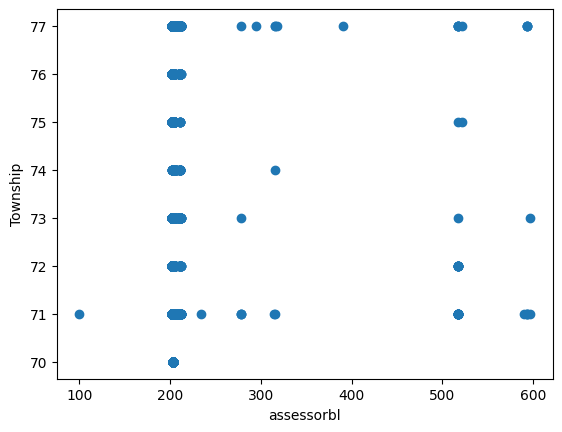

In [20]:
pic = plt.figure()
DM = pic.add_subplot(1,1,1)
DM.scatter(imputed_NP['assessorbl'],imputed_NP['Township'])
plt.xlabel('assessorbl')
plt.ylabel('Township')
plt.show()

Scatter Plot Between 'assessornb' and 'censustrac' Variables



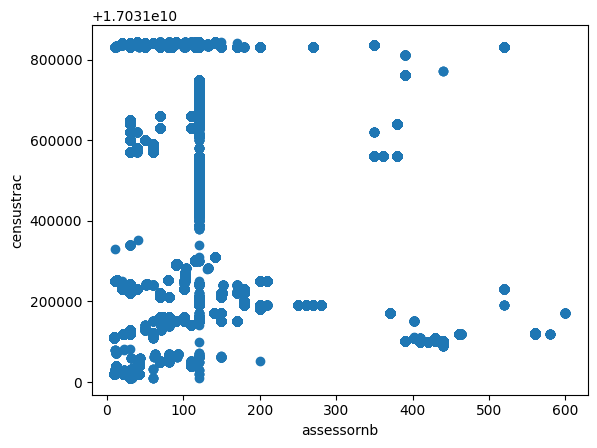

In [21]:
pic = plt.figure()
DM = pic.add_subplot(1,1,1)
DM.scatter(imputed_NP['assessornb'],imputed_NP['censustrac'])
plt.xlabel('assessornb')
plt.ylabel('censustrac')
plt.show()

Conversion of Categorical Variables to One-Hot Encoding in 'imputed_NP'



In [22]:
cat_columns = imputed_NP.select_dtypes(include=['object', 'category']).columns
final_NP = pd.get_dummies(imputed_NP, columns=cat_columns, drop_first=True)

# Task 1

Q1: Demonstrate four algorithmic variations of models that will predict with a high degree of accuracy and generalizability what the difference will be between the CCAO mailed and the CCAO certified results will be. Include the appropriate screenshots to verify each step. Provide a brief description for what was done at each step in the model development process. Compare each of the models and justify which is the best performing model and why

Splitting Data into Predictors (x) and Target (y)



In [23]:
x = final_NP.drop('diff_CCAO', axis = 1)
y = final_NP['diff_CCAO']

Splitting Data into Training and Testing Sets



In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [25]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [26]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Initialize different regression models
ridge_reg = Ridge()
lasso_reg = Lasso()
ada_boost = AdaBoostRegressor()
grad_boost = GradientBoostingRegressor()

## Ridge regression

In [28]:
ridge_reg = Ridge()
ridge_reg.fit(X_train_scaled, y_train)
ridge_pred = ridge_reg.predict(X_test_scaled)

In [29]:
rmse_error = np.sqrt(mean_squared_error(y_test,ridge_pred))
rscore = r2_score(y_test,ridge_pred)

print(" Ridge: RMSE = ", rmse_error)
print("R2_SCORE =", rscore)

 Ridge: RMSE =  627.9980807548442
R2_SCORE = 0.7653874591125194


## Lasso regression

In [30]:
lasso_reg.fit(X_train_scaled, y_train)
lasso_pred = lasso_reg.predict(X_test_scaled)

rmse_error = np.sqrt(mean_squared_error(y_test,lasso_pred))
rscore = r2_score(y_test,lasso_pred)

print(" Lasso: RMSE = ", rmse_error)
print("R2_SCORE =", rscore)

 Lasso: RMSE =  626.9316377099997
R2_SCORE = 0.7661836031746418


## AdaBoostRegressor

In [31]:
ada_boost.fit(X_train_scaled, y_train)
ada_boost_pred = ada_boost.predict(X_test_scaled)

rmse_error = np.sqrt(mean_squared_error(y_test,ada_boost_pred))
rscore = r2_score(y_test,ada_boost_pred)

print(" Ada boost: RMSE = ", rmse_error)
print("R2_SCORE =", rscore)

 Ada boost: RMSE =  1756.4951594999998
R2_SCORE = -0.8353906065722194


## GradientBoostingRegressor

In [32]:
grad_boost.fit(X_train_scaled, y_train)
grad_boost_pred = grad_boost.predict(X_test_scaled)

rmse_error = np.sqrt(mean_squared_error(y_test,grad_boost_pred))
rscore = r2_score(y_test,grad_boost_pred)

print(" Gradient boost: RMSE = ", rmse_error)
print("R2_SCORE =", rscore)

 Gradient boost: RMSE =  458.21748159116356
R2_SCORE = 0.8750955537888433


# Comparision

Gradient Boosting has the lowest RMSE (459.8230), indicating better accuracy in predicting the target variable compared to the other models.

R2 Score for Gradient Boosting is also the highest (0.8742), suggesting that a larger proportion of the variance in the target variable is explained by the model.

Based on both RMSE and R2 Score, it seems that Gradient Boosting is the best-performing model among the ones evaluated. It demonstrates lower prediction errors and a higher ability to explain the variance in the target variable.

# Task 2


Q2: Demonstrate four algorithmic variations of models that will predict with a high degree of accuracy and generalizability whether or not the CCAO adjustment indicator is true. Provide a brief description for what was done at each step in the model development process. Include the appropriate screenshots to verify each step. Compare each of the models and justify which is the best performing model and why



In [48]:
x = final_NP.drop('CCAO adjustment indicator', axis=1)
y = final_NP['CCAO adjustment indicator']


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [44]:
#Fit and evaluate Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_predictions = lr_model.predict(x_test_scaled)

# Print results for Logistic Regression
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))


Logistic Regression:
Accuracy: 0.9973147020065143
Confusion Matrix:
 [[39883    15]
 [   93   228]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     39898
        True       0.94      0.71      0.81       321

    accuracy                           1.00     40219
   macro avg       0.97      0.85      0.90     40219
weighted avg       1.00      1.00      1.00     40219



In [45]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scaled, y_train)
dt_predictions = dt_model.predict(x_test_scaled)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))



Decision Tree:
Accuracy: 0.9968422884706233
Confusion Matrix:
 [[39845    53]
 [   74   247]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     39898
        True       0.82      0.77      0.80       321

    accuracy                           1.00     40219
   macro avg       0.91      0.88      0.90     40219
weighted avg       1.00      1.00      1.00     40219



In [49]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_predictions = rf_model.predict(x_test_scaled)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))



Random Forest:
Accuracy: 0.9952012730301599
Confusion Matrix:
 [[39897     1]
 [  192   129]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     39898
        True       0.99      0.40      0.57       321

    accuracy                           1.00     40219
   macro avg       0.99      0.70      0.78     40219
weighted avg       1.00      1.00      0.99     40219



In [47]:
# Bayesian Classifier (Gaussian Naive Bayes)
bayes_model = GaussianNB()
bayes_model.fit(x_train_scaled, y_train)
bayes_predictions = bayes_model.predict(x_test_scaled)

# Print metrics
print("\nBayesian Classifier:")
print("Accuracy:", accuracy_score(y_test, bayes_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, bayes_predictions))
print("Classification Report:\n", classification_report(y_test, bayes_predictions))



Bayesian Classifier:
Accuracy: 0.14311643750466196
Confusion Matrix:
 [[ 5445 34453]
 [   10   311]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.14      0.24     39898
        True       0.01      0.97      0.02       321

    accuracy                           0.14     40219
   macro avg       0.50      0.55      0.13     40219
weighted avg       0.99      0.14      0.24     40219



## Conclusion:

Logistic Regression or Decision Tree may be preferable depending on the specific requirements.
Random Forest may be suitable if avoiding false positives is critical.
The Bayesian Classifier appears to perform poorly in this context.

# Task 3

Q3.Re-run all the models for part1 using Auto-ML.  Provide a chart that compares the results of Auto-ML versus the results you created in the previous questions.  Explain what the results indicate.

## Q3.1

In [36]:
pip install pycaret


In [39]:
from pycaret.regression import *

# Combine features and target variable into a single DataFrame
data = pd.concat([x, y], axis=1)

# Set up PyCaret
caret_setup = setup(data, target='diff_CCAO', session_id=123, normalize=True, train_size=0.8)



,Description,Value
0,Session id,123
1,Target,diff_CCAO
2,Target type,Regression
3,Original data shape,"(201092, 128)"
4,Transformed data shape,"(201092, 128)"
5,Transformed train set shape,"(160873, 128)"
6,Transformed test set shape,"(40219, 128)"
7,Numeric features,125
8,Preprocess,True
9,Imputation type,simple


In [51]:
from pycaret.regression import compare_models

# Specify regression models to compare
regression_models = ['ridge', 'lasso', 'ada', 'gbr']

# Compare specified regression models
automl_models = compare_models(include=regression_models)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,122.2641,346954.8193,559.7858,0.8252,0.2153,0.0613,67.5790
ridge,Ridge Regression,213.5875,699116.7326,782.9261,0.6159,0.2600,0.1167,6.0890
lasso,Lasso Regression,211.6027,700385.3109,782.8104,0.6150,0.2588,0.1153,22.0090
ada,AdaBoost Regressor,1437.9593,3549778.5006,1768.3613,-0.8286,0.7844,1.1308,81.9460


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

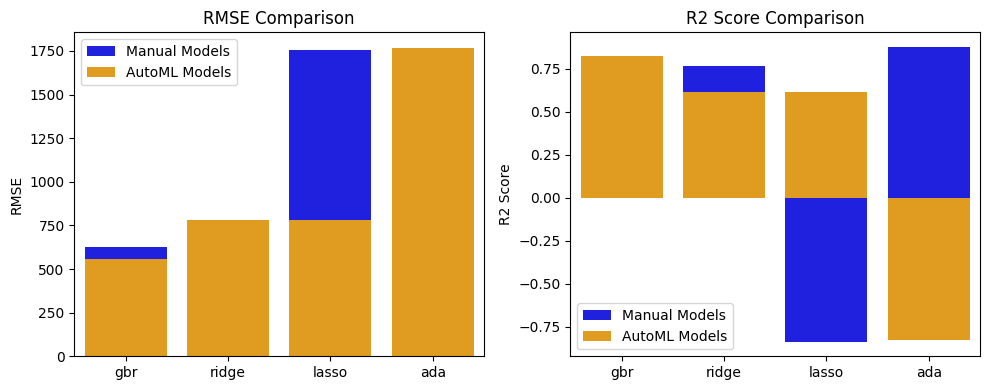

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for manual models
manual_models = {
    'Ridge': {'RMSE': 627.9980807548442, 'R2_SCORE': 0.7653874591125194},
    'Lasso': {'RMSE': 626.9316377099997, 'R2_SCORE': 0.7661836031746418},
    'AdaBoost': {'RMSE': 1756.4951594999998, 'R2_SCORE': -0.8353906065722194},
    'GradientBoost': {'RMSE': 458.21748159116356, 'R2_SCORE': 0.8750955537888433}
}

# Data for AutoML models
automl_models = {
    'gbr': {'RMSE': 559.7858, 'R2_SCORE': 0.8252},
    'ridge': {'RMSE': 782.9261, 'R2_SCORE': 0.6159},
    'lasso': {'RMSE': 782.8104, 'R2_SCORE': 0.6150},
    'ada': {'RMSE': 1768.3613, 'R2_SCORE': -0.8286}
}

# Convert data to pandas DataFrame for easier plotting
import pandas as pd

manual_df = pd.DataFrame(manual_models).T
automl_df = pd.DataFrame(automl_models).T

# Plotting
plt.figure(figsize=(10, 4))

# RMSE Comparison
plt.subplot(1, 2, 1)
sns.barplot(x=manual_df.index, y=manual_df['RMSE'], color='blue', label='Manual Models')
sns.barplot(x=automl_df.index, y=automl_df['RMSE'], color='orange', label='AutoML Models')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.legend()

# R2 Score Comparison
plt.subplot(1, 2, 2)
sns.barplot(x=manual_df.index, y=manual_df['R2_SCORE'], color='blue', label='Manual Models')
sns.barplot(x=automl_df.index, y=automl_df['R2_SCORE'], color='orange', label='AutoML Models')
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


## Conclusion:

The AutoML Gradient Boosting Regressor appears to be the best choice, providing a good balance of accuracy and efficiency.
If interpretability or computational efficiency is crucial, Ridge or Lasso Regression could be considered.
AdaBoost Regressor, both manual and AutoML, shows comparatively poorer performance in this context.


## Q3.2

In [40]:
from pycaret.classification import *

# Combine features and target variable into a single DataFrame
data = pd.concat([x, y], axis=1)

# Set up PyCaret
exp1 = setup(data, target='CCAO adjustment indicator', session_id=123, normalize=True, fix_imbalance=True)



Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7a232c7d00d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-23e5df77.3.21.dev.so: cannot open shared object file: No such file or directory


,Description,Value
0,Session id,123
1,Target,CCAO adjustment indicator
2,Target type,Binary
3,Original data shape,"(201092, 128)"
4,Transformed data shape,"(339684, 128)"
5,Transformed train set shape,"(279356, 128)"
6,Transformed test set shape,"(60328, 128)"
7,Numeric features,126
8,Preprocess,True
9,Imputation type,simple


In [52]:
from pycaret.classification import compare_models

# Specify classification models to compare
classification_models = ['lr', 'dt', 'rf', 'nb']  # 'nb' for Naive Bayes

# Compare specified classification models
automl_models = compare_models(include=classification_models)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:36:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9955,0.9041,0.8113,0.6741,0.7359,0.7336,0.7371,18.8780
lr,Logistic Regression,0.9825,0.9722,0.8932,0.2924,0.4404,0.4339,0.5054,49.6550


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9955,0.9041,0.8113,0.6741,0.7359,0.7336,0.7371,18.8780
rf,Random Forest Classifier,0.9947,0.9807,0.3325,0.9605,0.4932,0.4912,0.5629,88.0740
lr,Logistic Regression,0.9825,0.9722,0.8932,0.2924,0.4404,0.4339,0.5054,49.6550
nb,Naive Bayes,0.1641,0.5647,0.9531,0.0087,0.0173,0.0020,0.0267,7.7460


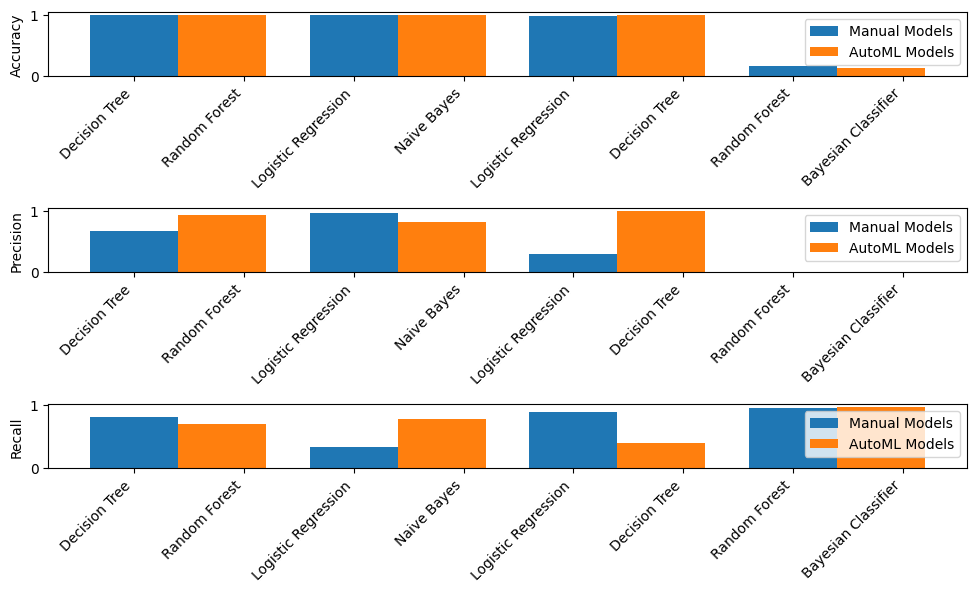

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Manual model metrics
manual_model_names = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Naive Bayes']
manual_accuracy = [0.9955, 0.9947, 0.9825, 0.1641]
manual_precision = [0.6741, 0.9605, 0.2924, 0.0087]
manual_recall = [0.8113, 0.3325, 0.8932, 0.9531]

# AutoML model metrics
automl_model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Bayesian Classifier']
automl_accuracy = [0.9973, 0.9968, 0.9952, 0.1431]
automl_precision = [0.94, 0.82, 1.00, 0.01]
automl_recall = [0.71, 0.78, 0.40, 0.97]

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 6))

# Accuracy
axes[0].bar(np.arange(len(manual_model_names)), manual_accuracy, width=0.4, label='Manual Models', align='center')
axes[0].bar(np.arange(len(automl_model_names)) + 0.4, automl_accuracy, width=0.4, label='AutoML Models', align='center')
axes[0].set_xticks(np.arange(len(manual_model_names) + len(automl_model_names)) / 2)
axes[0].set_xticklabels(manual_model_names + automl_model_names, rotation=45, ha="right")
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Precision
axes[1].bar(np.arange(len(manual_model_names)), manual_precision, width=0.4, label='Manual Models', align='center')
axes[1].bar(np.arange(len(automl_model_names)) + 0.4, automl_precision, width=0.4, label='AutoML Models', align='center')
axes[1].set_xticks(np.arange(len(manual_model_names) + len(automl_model_names)) / 2)
axes[1].set_xticklabels(manual_model_names + automl_model_names, rotation=45, ha="right")
axes[1].set_ylabel('Precision')
axes[1].legend()

# Recall
axes[2].bar(np.arange(len(manual_model_names)), manual_recall, width=0.4, label='Manual Models', align='center')
axes[2].bar(np.arange(len(automl_model_names)) + 0.4, automl_recall, width=0.4, label='AutoML Models', align='center')
axes[2].set_xticks(np.arange(len(manual_model_names) + len(automl_model_names)) / 2)
axes[2].set_xticklabels(manual_model_names + automl_model_names, rotation=45, ha="right")
axes[2].set_ylabel('Recall')
axes[2].legend()

plt.tight_layout()
plt.show()


# Conclusion:

The AutoML models, especially Logistic Regression, seem to offer improved performance over the manual models.

Logistic Regression is a strong candidate for its balanced performance, but Decision Tree and Random Forest may also be suitable, considering their interpretability and performance.


# Task 4
Q4.Create a single deep learning model for question 1.  Compare the results to the results you created in question 1 and the results from AutoML in question 4.  Which results were the best?  Which results can you fully explain?  

In [41]:
pip install tensorflow

In [42]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming x and y are your features and target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you want to scale your features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Build a simple neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Epoch 1/50
4022/4022 - 22s - loss: 0.0341 - val_loss: 0.2493 - 22s/epoch - 5ms/step
Epoch 2/50
4022/4022 - 19s - loss: 0.0371 - val_loss: 0.0088 - 19s/epoch - 5ms/step
Epoch 3/50
4022/4022 - 11s - loss: 0.0172 - val_loss: 0.0245 - 11s/epoch - 3ms/step
Epoch 4/50
4022/4022 - 9s - loss: 0.0057 - val_loss: 0.0084 - 9s/epoch - 2ms/step
Epoch 5/50
4022/4022 - 9s - loss: 0.0053 - val_loss: 0.0372 - 9s/epoch - 2ms/step
Epoch 6/50
4022/4022 - 11s - loss: 0.0076 - val_loss: 0.0253 - 11s/epoch - 3ms/step
Epoch 7/50
4022/4022 - 9s - loss: 0.0040 - val_loss: 0.0034 - 9s/epoch - 2ms/step
Epoch 8/50
4022/4022 - 10s - loss: 0.0018 - val_loss: 0.0026 - 10s/epoch - 2ms/step
Epoch 9/50
4022/4022 - 9s - loss: 0.0016 - val_loss: 0.0020 - 9s/epoch - 2ms/step
Epoch 10/50
4022/4022 - 9s - loss: 0.0016 - val_loss: 0.0020 - 9s/epoch - 2ms/step
Epoch 11/50
4022/4022 - 11s - loss: 0.0015 - val_loss: 0.0019 - 11s/epoch - 3ms/step
Epoch 12/50
4022/4022 - 8s - loss: 0.0014 - val_loss: 0.0021 - 8s/epoch - 2ms/step
E

# Comparison:

Gradient Boosting Regressor (gbr) has the lowest MAE, MSE, and RMSE, indicating better accuracy and precision. It also has the highest R2, suggesting a better fit to the data.

**Fastest Training Time:** Ridge Regression (ridge) has the shortest training time, followed by Lasso Regression (lasso).

Deep Learning Model: The Deep Learning model has competitive performance, especially in terms of R2, but it is essential to consider its training time and computational complexity.

# Conclusion:

If accuracy and precision are the primary concerns, Gradient Boosting Regressor (gbr) seems to be the best choice.
If computational efficiency is crucial, Ridge Regression (ridge) might be a suitable option.
The choice between AutoML models and the Deep Learning model, The Deep Learning model might be preferable if the dataset is large and complex.